In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

In [2]:
data_train = pd.read_csv('watermelon_train.txt', delimiter=',', header=0)
data_test = pd.read_csv('watermelon_test.txt', delimiter=',', header=0)
pre_data = pd.concat([data_train, data_test], ignore_index=True)
pre_data

,编号,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
3,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
4,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
5,10,青绿,硬挺,清脆,清晰,平坦,软粘,否
6,14,浅白,稍蜷,沉闷,稍糊,凹陷,硬滑,否
7,15,乌黑,稍蜷,浊响,清晰,稍凹,软粘,否
8,16,浅白,蜷缩,浊响,模糊,平坦,硬滑,否
9,17,青绿,蜷缩,沉闷,稍糊,稍凹,硬滑,否


In [3]:
def auto_encode_categorical_features(data):
    mapping_dict = {}
    re_mapping_dict = {}
    for column in data.select_dtypes(include=['object']).columns:
        unique_values = data[column].unique()
        mapping = {value: idx for idx, value in enumerate(unique_values)}
        re_mapping = {idx: value for idx, value in enumerate(unique_values)}
        data[column] = data[column].map(mapping)
        mapping_dict[column] = mapping
        re_mapping_dict[column] = re_mapping
    return data, mapping_dict, re_mapping_dict

# 调用函数进行自适应编码
data, mapping_dict,re_mapping_dict = auto_encode_categorical_features(pre_data)

X_train = data.iloc[0:10, 1:7].to_numpy()  # 选择前10行的特征列
y_train = data.iloc[0:10, 7].to_numpy()   # 选择前10行的标签列
X_test = data.iloc[10:17, 1:7].to_numpy()     # 选择前7行的特征列
y_test = data.iloc[10:17, 7].to_numpy()       # 选择前7行的标签列
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])
X_train

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1],
       [0, 2, 2, 0, 2, 1],
       [2, 1, 1, 1, 0, 0],
       [1, 1, 0, 0, 1, 1],
       [2, 0, 0, 2, 2, 0],
       [0, 0, 1, 1, 1, 0]], dtype=int64)

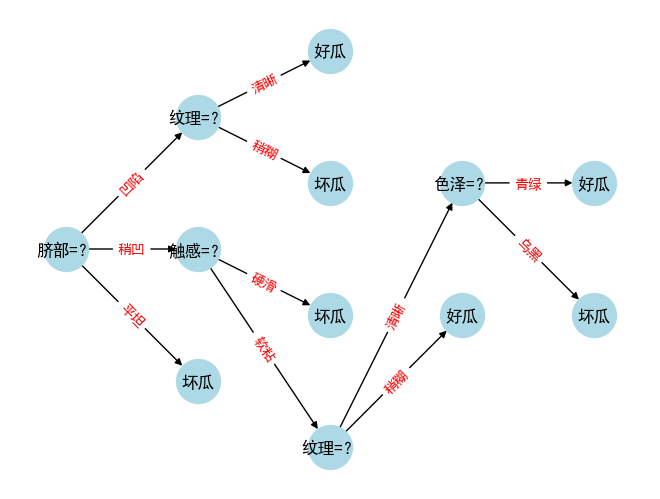

0.8571428571428571

In [4]:
from DecisionTree import DecisionTree, PlotDT
tree = DecisionTree(pre_data.columns[1: 7], re_mapping_dict, max_depth=None)
decision_tree = tree.fit(X_train, y_train)
canvas = PlotDT()
canvas.plotTree(decision_tree)
y_pred = tree.predict(X_test, decision_tree)
acc = sum(y_pred == y_test) / len(y_pred)
acc

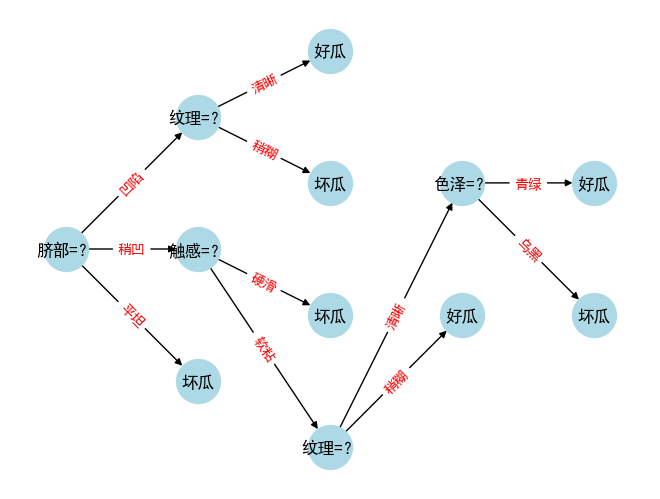

0.8571428571428571

In [5]:
decision_tree = tree.fit(X_train, y_train, criterion='gain_ratio')
canvas = PlotDT()
canvas.plotTree(decision_tree)
y_pred = tree.predict(X_test, decision_tree)
acc = sum(y_pred == y_test) / len(y_pred)
acc

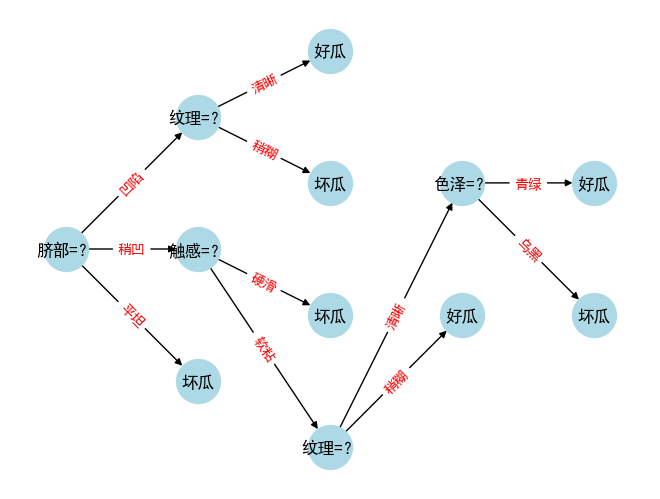

0.8571428571428571

In [6]:
decision_tree = tree.fit(X_train, y_train, criterion='gini')
canvas = PlotDT()
canvas.plotTree(decision_tree)
y_pred = tree.predict(X_test, decision_tree)
acc = sum(y_pred == y_test) / len(y_pred)
acc